In [27]:
from numpy import *
from scipy import *
from scipy.linalg import *
from scipy.interpolate import *
import matplotlib.pyplot as plt
from scipy.optimize import *
import random

# Linear equations 

Lets solve 3 * x$_0$ + x$_1$ = 9 and x$_0$ + 2 * x$_1$ = 8


In [8]:
a = array([[3,1], [1,2]])  # These are the left side terms in the first and second eqs respectively
b = array([9,8])           # These are the right side terms
x = linalg.solve(a, b)     # use "solve" function from linalg (linear algebra)
print (x)

[2. 3.]


In [41]:
a = array([[1, 2, 0], [0, 0, 3], [4, 0, 5]])  # These are the left side terms in the first and second eqs respectively
b = array([1,1,1])           # These are the right side terms
x = linalg.solve(a, b)     # use "solve" function from linalg (linear algebra)
print (x)

[-0.16666667  0.58333333  0.33333333]


# Polynomials

## Evaluating a polynomial function
Polynomials can be represented as a list of coefficients. For example, the polynomial 4x$^3$ + 3x$^2$ −2x + 10 = 0 can be represented as [4, 3, -2, 10]. Here are some ways to create a polynomial object, and evaluate it.


In [60]:
polycoeff = [4, 3, -2, 10]  # Input the polynomial coefficients, highest order first
PolyFunc = poly1d(polycoeff) # use poly1d to tell python to create the polynomial function with the given name 
PolyFuncDer = polyder(polyfunc)  # You can even calculate the derivative 
PolyFuncInt = polyint(polyfunc)   # or the integral !

print (PolyFunc)
print ('----------------------')
print (PolyFuncDer)
print ('----------------------')
print (PolyFuncInt)
print ('----------------------')
print (p(3), p(-10) )

   3     2
4 x + 3 x - 2 x + 10
----------------------
    2
12 x + 6 x - 2
----------------------
   4     3     2
1 x + 1 x - 1 x + 10 x
----------------------
139 -3670


## Finding roots of the polynomial

In [66]:
print (roots([2, 0, -1]))  # "roots" is a very powerfull function that find the roots of polynomials
print (roots([1, 0, 1]))  # It even works for polynomials with complex number solutions !

[-0.70710678  0.70710678]
[-0.+1.j  0.-1.j]


## Example: The Van Der Waal equation 
$f(V) = V^3 - \frac{p n b + n R T}{p} V^2 + \frac{n^2 a}{p}V - \frac{n^3 a b}{p} = 0$
where a and b are constants, p is the pressure, R is the gas constant, T is an absolute temperature and n is the number of moles. The roots of this equation tell you the volume of the gas at those conditions.

In [19]:
a = 3.49e4
b = 1.45
p = 679.7   # pressure in psi
T = 683     # T in Rankine
n = 1.136   # lb-moles
R = 10.73       # ft^3 * psi /R / lb-mol

ppar = [1.0, -(p*n*b+n*R*T)/p, n**2*a/p,  -n**3*a*b/p]
print (roots(ppar))

[5.09432376+0.j         4.4006681 +1.43502848j 4.4006681 -1.43502848j]


# Interpolations

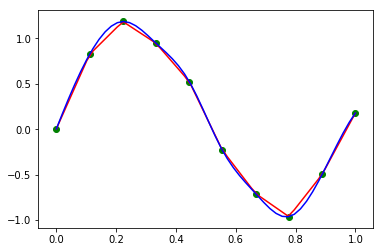

In [21]:
# Line below means create a linear array with 10 elements that starts with 0 and ends at 1
measured_time = linspace(0, 1, 10)
noise = (random.random(10)) * 2e-1   # Create random noise
measures = sin(2 * pi * measured_time) + noise  # Create measured signal: sin wave + noise
plt.scatter(measured_time,measures, c='g' )  # plot measured signal 


linear_interp = interp1d(measured_time, measures)   # create a 1d interpolator fitting x and y
interpolation_time = linspace(0, 1, 50)             # create a new array of x' values
linear_results = linear_interp(interpolation_time)  # calculate y for x' using the interpolated function 
plt.plot(interpolation_time, linear_results, c='r') # Plot


cubic_interp = interp1d(measured_time, measures, kind='cubic')  # same as above, but cubic interpolation
# kind can also be ‘linear’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’ ....
cubic_results = cubic_interp(interpolation_time)
plt.plot(interpolation_time, cubic_results, c='b')

plt.show()

# Curves fitting

## We will use curve_fit (non-linear least squares method that fits a function, f, to data)

curve_fit(f, xdata, ydata, p0, sigma)

xdata : An M-length sequence or an (k,M)-shaped array for functions with k predictors
The independent variable where the data is measured.

ydata : M-length sequence
The dependent data — nominally f(xdata, …)

p0 : None, scalar, or N-length sequence, optional
Initial guess for the parameters. If None, then the initial values will all be 1 (if the number of parameters for the function can be determined using introspection, otherwise a ValueError is raised).

sigma : None or M-length sequence or MxM array, optional, Determines the uncertainty in ydata


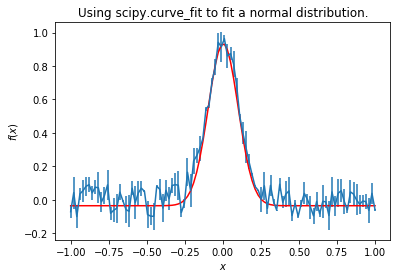

In [114]:
# Create a function which returns a Gaussian (normal) distribution.
def gauss(x, *p):
    a, b, c, d = p
    y = a*exp(-((x - b)**2.)/(2. * c**2.)) + d
    return y + 0.1*(random.random()*2. - 1.)

# Choose some initial guesses for our params (a, b, c, d above) for our distribution 
initial_guess = [1.0, 0.0, 0.1, 0.0]

N = 100 # Number of data points.

# Create our data sets. 
x = linspace(-1, 1, N)
y = array([gauss(i, *initial_guess) for i in x])

# generate completely random data for the errors.
e = array([random.random()*0.1 for _ in y])

# Use curve_fit to fit the gauss function to our data. Use the
# unperturbed p_initial as our initial guess.
popt, pcov = curve_fit(gauss, x, y, p0=p_initial, sigma=e)

# Generate y-data based on the fit.
y_fit = gauss(x, *popt)

# Create a plot of our work, showing both the data and the fit.

plt.errorbar(x,y,e)
plt.plot(x, y_fit, color = 'red')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title('Using scipy.curve_fit to fit a normal distribution.')

plt.show()

# Fourier transforms

/home/mad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


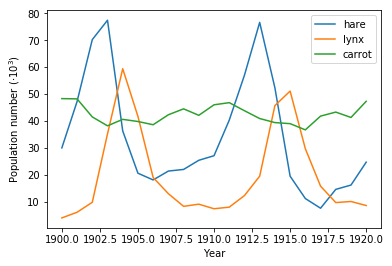

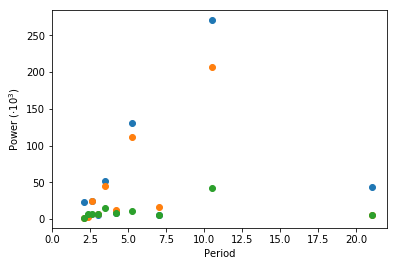

In [144]:
data = loadtxt('./populations.txt')
years = data[:, 0]
populations = data[:, 1:]

# Below computes the 1d n-point discrete Fourier Transform (DFT) with the efficient Fast Fourier Transform (FFT).
ft_populations = fft.fft(populations, axis=0) 

# Below Return the Discrete Fourier Transform sample frequencies.
frequencies = fft.fftfreq(populations.shape[0], years[1] - years[0])
periods = 1 / frequencies

plt.figure()
plt.plot(years, populations * 1e-3)
plt.xlabel('Year')
plt.ylabel('Population number ($\cdot10^3$)')
plt.legend(['hare', 'lynx', 'carrot'], loc=1)

plt.figure()
plt.plot(periods, abs(ft_populations) * 1e-3, 'o')
plt.xlim(0, 22)
plt.xlabel('Period')
plt.ylabel('Power ($\cdot10^3$)')

plt.show()

# There's probably a period of around 10 years (obvious from the
# plot), but for this crude a method, there's not enough data to say
# much more.

# Root finding for non linear equations 

In [158]:
from scipy.special import *
def func(x):
    # j1 is Bessel function of the first kind of order 1.
    # y0 is Bessel function of the second kind of order 0.
    return x*3 + 2 * cos(x) - tan(x**2) + j1(x) + (y0(x))**4.

sol = root(func, 0.3, method='hybr', jac=None)
print (sol.x)

[0.3]
